In [1]:
from dataclasses import dataclass

import numpy as np
from pyraysum import prs, Model, Geometry, Control

In [2]:
@dataclass
class Layer:
    thickness: float | None
    rho: float
    v_p: float
    v_s: float

In [3]:
layers = [
    Layer(thickness=10000, rho=2304, v_p=3800, v_s=1850),
    Layer(thickness=12000, rho=2570, v_p=4500, v_s=2800),
    Layer(thickness=0, rho=2863, v_p=6220, v_s=3750),
]
model2 = Model(
    thickn=[l.thickness for l in layers],
    rho=[l.rho for l in layers],
    vp=[l.v_p for l in layers],
    vs=[l.v_s for l in layers],
)

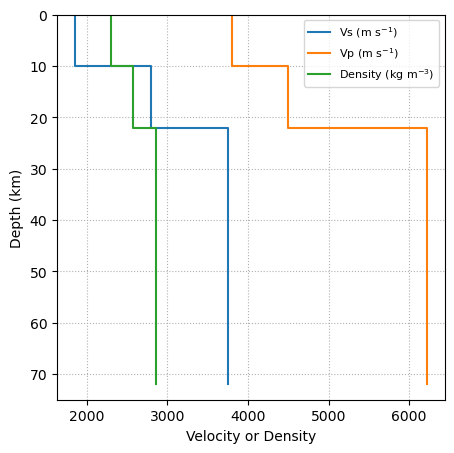

/home/tom/miniconda3/envs/prs/lib/python3.10/site-packages/pyraysum/prs.py:986: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


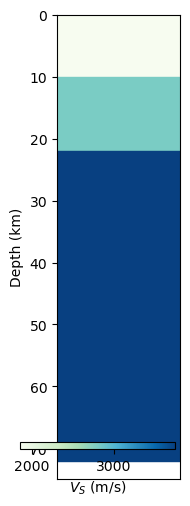

<Axes: ylabel='Depth (km)'>

In [4]:
model2.plot_profile()
model2.plot_layers()

In [5]:

# Define model with isotropic crust over isotropic half-space mantle
model = Model([30000., 0], [2800., 3300.], [6000., 8000.], [3600., 4500.])
geom = Geometry(0., 0.05)  # baz = 0 deg; slow = 0.06 s/km
rc = Control(dt=0.025, npts=1500, mults=1, rot=1)

2 Trace(s) in Stream:
...RFR | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:37.475000Z | 40.0 Hz, 1500 samples
...RFT | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:37.475000Z | 40.0 Hz, 1500 samples


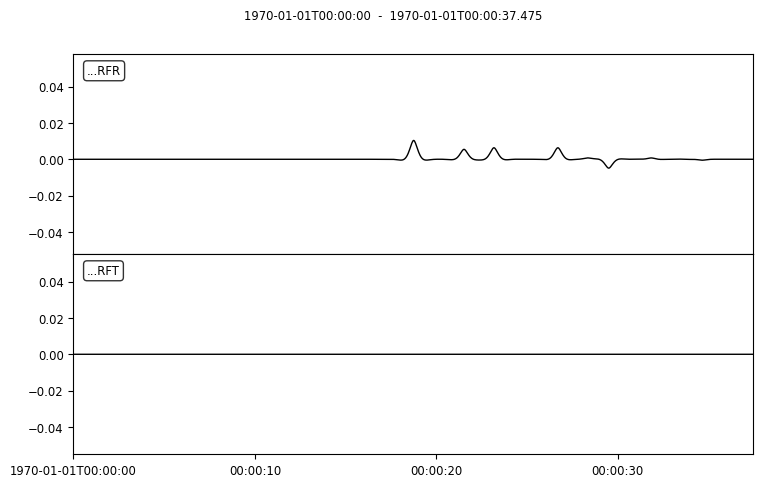

In [6]:
streamlist1 = prs.run(model, geom, rc, rf=True)
streamlist2 = prs.run(model2, geom, rc, rf=True)
print(streamlist1.rfs[0])
# Filter and plot
streamlist2.filter('rfs', 'lowpass', freq=1., corners=2, zerophase=True)
streamlist2.rfs[0].plot(show=False)

In [7]:
from datetime import timedelta

start = streamlist2.rfs[0][0].meta.starttime
end = streamlist2.rfs[0][0].meta.endtime
new_start = start + timedelta(seconds=(end - start)/2)
new_st = streamlist2.rfs[0][0].slice(new_start, end)

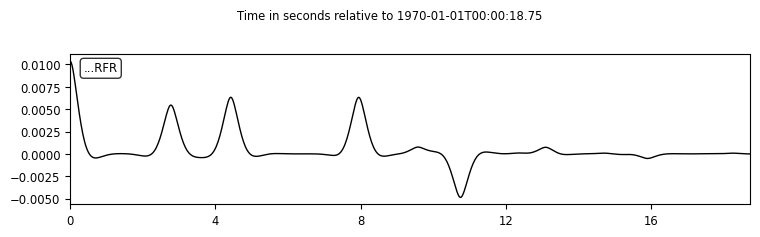

In [8]:
new_st.plot(show=False, type="relative")

In [9]:
syn_y = new_st.data
syn_x = np.arange(0, len(syn_y), 1) / 40

np.save("../data/synthetic.npy", np.array([syn_x, syn_y]))